## Plot the training data

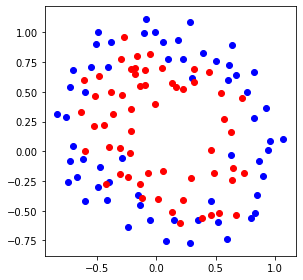

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
%matplotlib inline


data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Plot the training error with varying regularization parameters 

In [144]:
degree = 9
iteration = 2000
alpha =0.1
m = label.size
# np.random.seed(777)
# theta = np.random.normal(100)

In [145]:
def high_dimension(x,y,degree):
    basic = np.ones(x.shape[0])
    for i in range(1,degree+1):
        for j in range(0,i+1):
            basic = np.column_stack((basic,(x**(i-j))*(y**j)))
    return basic

In [146]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [147]:
def cost(theta,x,y,reg):
    # data fidelity term
    z = x.dot(theta)
    h = sigmoid(z)
    data_fi_term1 = y * np.log(h)
    data_fi_term2 = (1-y) * np.log(1-h)
    j = -np.sum(data_fi_term1 + data_fi_term2, axis = 0) / m
    
    #data regulization term
    reg_term = (reg * np.sum(theta[1:]**2)) / (2*m)
    j = j + reg_term
    return j

# set reg ramda

In [148]:
x_parameters = high_dimension(pointX,pointY,degree)

In [149]:
y = label

In [469]:
x_parameters.shape

(118, 55)

In [202]:
init_theta = np.zeros(x_parameters.shape[1]).reshape(x_parameters.shape[1],1)

In [224]:
init_theta.shape

(55, 1)

In [437]:
def gradient_descent(X,label,theta,iterations,alpha,reg):
    cost_history=[]
    theta_history=[theta]
    accuracy_history=[]
    for i in range(iterations):
        prediction = np.dot(X,theta)
        sig = sigmoid(prediction)
        error = sig- label
        accuracy_history.append(sig)
        cost_history.append(cost(theta,X,label,reg))
        theta = theta - (alpha*((1/m)*np.matmul(X.T,error)+(reg / m)*theta))
        theta_history.append(theta)
    return theta_history, cost_history , accuracy_history , reg

In [438]:
theta_history01,cost_history01,accuracy_history01,reg_pa1 = gradient_descent(x_parameters,label,init_theta,iteration,alpha,1)
theta_history02,cost_history02,accuracy_history02,reg_pa2 = gradient_descent(x_parameters,label,init_theta,iteration,alpha,2.2)
theta_history03,cost_history03,accuracy_history03,reg_pa3 = gradient_descent(x_parameters,label,init_theta,iteration,alpha,2.9)

In [288]:
len(accuracy_history01)

236000

In [154]:
cost_history011 = []
cost_history021 = [] 
cost_history031 = [] 
for i in range(iteration):
    cost_history011.append(cost_history01[i][0])
    cost_history021.append(cost_history02[i][0])
    cost_history031.append(cost_history03[i][0])

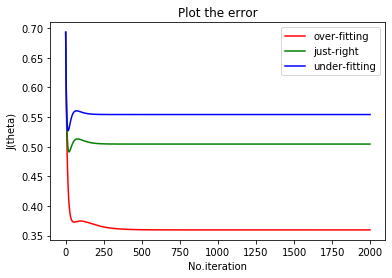

In [155]:
plt.title('Plot the error')
plt.ylabel('J(theta)')
plt.xlabel('No.iteration')
plt.plot(cost_history011,c='r',label='over-fitting')
plt.plot(cost_history021,c='g',label='just-right')
plt.plot(cost_history031,c='b',label='under-fitting')
plt.legend()
plt.show()

In [122]:
def prGreen(prt): print("\033[92m {}\033[00m".format(prt))
def prRed(prt): print("\033[31m {}\033[00m".format(prt))
def prBlue(prt): print("\033[94m {}\033[00m".format(prt))

In [123]:
print("lambda01 :")
prRed(reg_pa1)
print("lambda02 :")
prGreen(reg_pa2)
print("lambda03 :")
prBlue(reg_pa3)

lambda01 :
 1
lambda02 :
 2.2
lambda03 :
 2.9


In [269]:
accuracy = []
correct = 0
for i in range(1,2000):
    k = 0
    correct=0
    for j in range(118):
        if(((accuracy_history01[i][j][k] <= 0.5) and (label[k] == 0)) and ((accuracy_history01[i][j][k] > 0.5) and (label[k] == 1))):
            correct = correct + 1
            k = k+1
        else:
            continue
    accuracy.append(correct)
    
    

In [318]:
accuracy01 = []
accuracy02 = []
accuracy03 = []
j =0
for i in range(1,iteration):
    a = accuracy_history01[i][0][0]
    b = accuracy_history02[i][0][0]
    c = accuracy_history03[i][0][0]
    accuracy01.append(a)
    accuracy02.append(b)
    accuracy03.append(c)

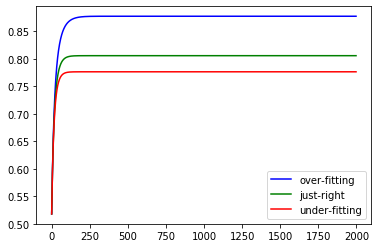

In [325]:
plt.plot(accuracy01,c='b',label='over-fitting')
plt.plot(accuracy02,c='g',label='just-right')
plt.plot(accuracy03,c='r',label='under-fitting')
plt.legend()

In [326]:
print("lambda01 :")
prRed(accuracy01[-1])
print("lambda02 :")
prGreen(accuracy02[-1])
print("lambda03 :")
prBlue(accuracy03[-1])

lambda01 :
 0.8771188783516805
lambda02 :
 0.8054272117830827
lambda03 :
 0.7761205780136586


In [662]:
def plotDecisionBoundary(x,y,theta,degree, axes,a):
    u = np.linspace(x.min(), x.max(),50)
    v = np.linspace(y.min(), y.max(),50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = high_dimension(U,V,degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    if(a == 1):
        cs = axes.contour(U,V,Z,levels=3,colors='b',label='1')
    elif(a == 2):
        cs = axes.contour(U,V,Z,levels=2,colors='g',label='1')
    else:
        cs = axes.contour(U,V,Z,levels=1,colors='r',label='1')
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs


In [663]:
theta_recent01 = theta_history01[-1]
theta_recent02 = theta_history02[-1]
theta_recent03 = theta_history03[-1]
theta_re=[]
for i in range(55):
    theta_re.append(theta_recent01[i][0])
    
theta_history01[1].shape

new01 = []
new02 = []
new03 = []
for i in range(55):
    new01.append(theta_history01[-1][i][0])
    new02.append(theta_history02[-1][i][0])
    new03.append(theta_history03[-1][i][0])

C:\Users\ihbor\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'label'
C:\Users\ihbor\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'label'
C:\Users\ihbor\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'label'
No handles with labels found to put in legend.


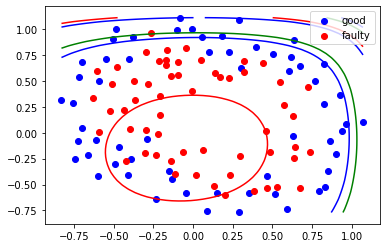

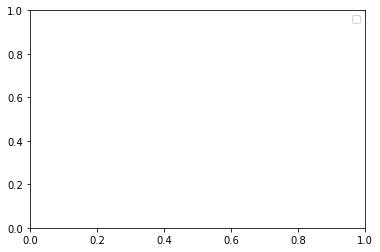

In [664]:
fig, axes = pp.subplots();
plt.figure()
axes.scatter(pointX0, pointY0, c='b')
axes.scatter(pointX1, pointY1, c='r')
# axes.gca().set_aspect('equal', adjustable='box')
cs1=plotDecisionBoundary(pointX,pointY,new01, degree, axes,1)
cs2=plotDecisionBoundary(pointX,pointY,new02, degree, axes,2)
cs3=plotDecisionBoundary(pointX,pointY,new03, degree, axes,3)
plt.legend()
plt.show()

In [486]:
new

[3.101184319388812,
 0.006443011886794304,
 0.15270328712723696,
 0.6609993531118857,
 -0.07998499799959626,
 0.7003820396121658,
 0.07786568097889515,
 0.033627507755404275,
 0.04081484848902719,
 0.16323805282065648,
 0.28436047207513493,
 -0.022300281741594388,
 0.11309131657840893,
 -0.030518750164005865,
 0.3017329206617631,
 0.07321359555544317,
 0.01382765700779467,
 0.01907101586419513,
 0.02346945703583794,
 0.016539041701607776,
 0.12207111113051367,
 0.15926145333570785,
 -0.008385647193985104,
 0.040828229916759835,
 -0.006672672941242954,
 0.04173439697085814,
 -0.013885256777703437,
 0.1701966341870659,
 0.06420962798214032,
 0.007228243263253073,
 0.010945026042448585,
 0.007417590494072966,
 0.0069372103880461986,
 0.014796254361432044,
 0.005287855794475449,
 0.09595656018503747,
 0.10469396748529469,
 -0.0033168957000754037,
 0.019362404463557185,
 -0.002090852093517792,
 0.013396042895410456,
 -0.0023307966057953817,
 0.02058241780129246,
 -0.007925853006231602,
 0.1

In [217]:
# accuracy_history011 =[]
# accuracy_history021 =[]
# accuracy_history031 =[]
# for i in range(iteration):
#     accuracy_history011.append(cost_history01[i][0])
#     accuracy_history021.append(cost_history02[i][0])
#     accuracy_history031.append(cost_history03[i][0])
# correct_history =[]
# for i in range(1,2000):
#     correct = 0
#     non_c = 0
#     for j in range(0,118):
#         for k in range(0,118):
#             if((accuracy_history01[i][j][k] <= 0.5) and (label[k] == 0)):
#                 correct += 1
#             elif((accuracy_history01[i][j][k] > 0.5) and (label[k] == 1)):
#                 correct += 1
#     correct_history.append(correct)